# Exercise 3 part 2

- From the dataset two columns have missing informations: `valor_condominio` and `qtd_dados_bairro`. For the column `valor_condominio` we can assume that the missing values means that a property is a house and not a condominium so a valid value for the missing ones is zero. The column `qtd_dados_bairro` holds the amount of property by neighborhood, since there are missing values instead of relying on this column, we could group data by neighborhood to recalculate this value or even find another relationships.
- When analyzing columns data types, we discover that some _float_ values are stored as _string_, we can and should cast values to numeric values instead of string to allow us to operate over these values. The numeric columns stored as _string_ are: `media_idh`, `expectativa_vida`, `renda_percapita`, `dist`, `lat` and `lon`.
- For the columns `valor_total` we have some values bigger than average value. For this column we could try to remove outlier from the samples. We could than calculate correlation between variables to understand relations between `valor_total` and other variables.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
# I'm loading the data from the CSV file using ';' as delimiter since each
# attribute is separated by ';'
data = pd.read_csv("dados_reduzidos.csv", delimiter=";")

In [3]:
# Each sample has an ID, so i'm using this ID as the dataframe index
data.set_index("id", inplace=True)

In [4]:
data

,valor_total,area_util,quartos,vagas,valor_condominio,suites,banheiros,piscina,academia,quadra,...,bairro,qtd_dados_bairro,media_idh,expectativa_vida,renda_percapita,estacao_prox,linha_prox,dist,lat,lon
id,,,,,,,,,,,,,,,,,,,,,
526,189900,32,2,1,180.0,0,1,0,1,0,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",SÃO MATEUS,PRATA,"6822,823684","-23,5838787","-46,417548"
734,221110,43,2,1,250.0,0,1,0,0,1,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",CORINTHIANS-ITAQUERA,VERMELHA,"4682,709841","-23,5435347","-46,4254919"
738,219990,43,1,1,300.0,0,1,1,0,0,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",CORINTHIANS-ITAQUERA,VERMELHA,"4579,311123","-23,5373392","-46,4268225"
753,219990,43,2,1,300.0,0,1,1,0,0,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",CORINTHIANS-ITAQUERA,VERMELHA,"4579,311123","-23,5373392","-46,4268225"
924,220000,41,2,1,300.0,0,1,1,1,1,...,JOSE BONIFACIO,36.0,"0,697181818","72,75181818","559,6681818",CORINTHIANS-ITAQUERA,VERMELHA,"3313,918703","-23,5577993","-46,4435232"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,400000,61,1,0,NaN,0,1,0,0,0,...,REPUBLICA,17.0,"0,839666667","79,77666667","1691,543333",REPÚBLICA,AMARELA,"517,30702","-23,5492334","-46,6442819"
2233,688000,146,2,1,600.0,1,3,0,0,0,...,REPUBLICA,17.0,"0,839666667","79,77666667","1691,543333",REPÚBLICA,AMARELA,"452,9508368","-23,5487055","-46,6438873"
2234,275000,40,1,0,382.0,0,1,0,0,0,...,REPUBLICA,17.0,"0,839666667","79,77666667","1691,543333",REPÚBLICA,AMARELA,"362,4140008","-23,5468044","-46,6459634"


In [5]:
data.sort_values(by='valor_total', inplace=True)

In [6]:
# I'm verifying if there is any empty sample by count how many
# columns have missing values
# As we can see, 'valor_condominio' and 'qtd_dados_bairro' have some missing data
data.isna().sum()

valor_total           0
area_util             0
quartos               0
vagas                 0
valor_condominio    235
suites                0
banheiros             0
piscina               0
academia              0
quadra                0
link                  0
bairro                0
qtd_dados_bairro      7
media_idh             0
expectativa_vida      0
renda_percapita       0
estacao_prox          0
linha_prox            0
dist                  0
lat                   0
lon                   0
dtype: int64

In [7]:
# since "qtd_dados_bairro" is the amount of propertis by neighborhood
# we can calculate it from the data, so we can drop it
data.drop('qtd_dados_bairro', inplace=True, axis=1)

In [8]:
# Maybe valor_condominio is unavailable because properties are houses and we can make it 0
data.loc[data['valor_condominio'].isna(), ['valor_condominio']] = 0

In [9]:
data.isna().sum()

valor_total         0
area_util           0
quartos             0
vagas               0
valor_condominio    0
suites              0
banheiros           0
piscina             0
academia            0
quadra              0
link                0
bairro              0
media_idh           0
expectativa_vida    0
renda_percapita     0
estacao_prox        0
linha_prox          0
dist                0
lat                 0
lon                 0
dtype: int64

In [10]:
def format_float(row):
    columns = ['media_idh', 'expectativa_vida', 'renda_percapita', 'dist', 'lat', 'lon']
    for col in columns:
        row[col] = float(row[col].replace(',', '.'))
    return row

In [11]:
# Make numeric values as float
data = data.apply(format_float, axis=1)

In [12]:
data.dtypes

valor_total           int64
area_util             int64
quartos               int64
vagas                 int64
valor_condominio    float64
suites                int64
banheiros             int64
piscina               int64
academia              int64
quadra                int64
link                 object
bairro               object
media_idh           float64
expectativa_vida    float64
renda_percapita     float64
estacao_prox         object
linha_prox           object
dist                float64
lat                 float64
lon                 float64
dtype: object

In [13]:
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

In [14]:
# Getting correlation between numeric columns
data[numeric_columns].corr()

,valor_total,area_util,quartos,vagas,valor_condominio,suites,banheiros,piscina,academia,quadra,media_idh,expectativa_vida,renda_percapita,dist,lat,lon
valor_total,1.000000,0.834551,0.522936,0.454929,0.015203,0.724456,0.772444,0.147496,0.046263,0.004944,0.445265,0.393948,0.556518,-0.172290,-0.055577,-0.242592
area_util,0.834551,1.000000,0.636093,0.496389,0.003290,0.687467,0.772868,0.080236,0.013678,-0.010450,0.293865,0.258375,0.407720,-0.121280,-0.078773,-0.220671
quartos,0.522936,0.636093,1.000000,0.402821,-0.016081,0.567100,0.632794,0.086106,0.026813,0.059247,0.150872,0.129756,0.221800,-0.077952,0.001095,-0.119525
vagas,0.454929,0.496389,0.402821,1.000000,-0.004448,0.436196,0.474667,0.119230,0.075471,0.068896,0.168297,0.148634,0.228402,-0.075973,-0.003275,-0.133604
valor_condominio,0.015203,0.003290,-0.016081,-0.004448,1.000000,-0.001908,-0.000656,-0.026681,-0.016253,-0.024799,0.007326,0.013429,-0.000931,-0.006086,0.019934,-0.014099
suites,0.724456,0.687467,0.567100,0.436196,-0.001908,1.000000,0.837799,0.218921,0.103824,0.030230,0.386516,0.364166,0.439171,-0.226204,-0.025837,-0.258820
banheiros,0.772444,0.772868,0.632794,0.474667,-0.000656,0.837799,1.000000,0.166079,0.066870,0.011381,0.420235,0.392645,0.489374,-0.237978,-0.012382,-0.238828
piscina,0.147496,0.080236,0.086106,0.119230,-0.026681,0.218921,0.166079,1.000000,0.356402,0.378850,0.185172,0.187513,0.154782,-0.145565,0.040688,-0.084577
academia,0.046263,0.013678,0.026813,0.075471,-0.016253,0.103824,0.066870,0.356402,1.000000,0.250986,0.107075,0.112215,0.071038,-0.085072,0.019685,-0.044432
quadra,0.004944,-0.010450,0.059247,0.068896,-0.024799,0.030230,0.011381,0.378850,0.250986,1.000000,-0.023614,-0.016243,-0.037892,-0.034812,0.026561,-0.029548


From the correlation matrix we can see that **util area**, **suites** and **bathrooms** have a high influence in property's price.
Some social economic information have slight influence in property's price this is influeced by the neighborhood the property belongs.

<Axes: ylabel='valor_total'>

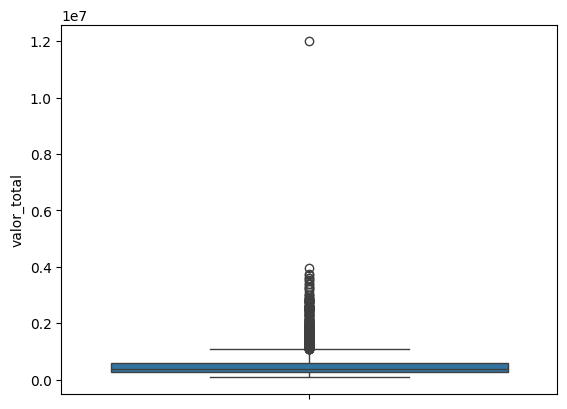

In [15]:
sns.boxplot(data['valor_total'])

From this boxplot we can see that there is a huge amount of outliers and a huge outlier that weights too much our analysis.

In [16]:
# Getting quantiles positions
q1 = data['valor_total'].quantile(0.25, interpolation='midpoint')
q3 = data['valor_total'].quantile(0.75, interpolation='midpoint')
IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

print("q1", q1, 'q3', q3, "IRQ", IQR, "Lower", lower_bound, "Upper", upper_bound, sep="=")

q1=265000.0=q3=598500.0=IRQ=333500.0=Lower=-235250.0=Upper=1098750.0


In [17]:
# Removing outlier based on quantiles
data = data[(data['valor_total'] >= lower_bound) & (data['valor_total'] <= upper_bound)]

<Axes: ylabel='valor_total'>

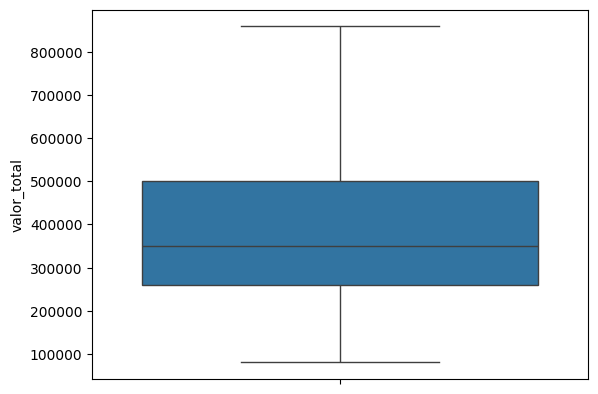

In [18]:
sns.boxplot(data['valor_total'], showfliers=False)

In [19]:
data[numeric_columns].corr()

,valor_total,area_util,quartos,vagas,valor_condominio,suites,banheiros,piscina,academia,quadra,media_idh,expectativa_vida,renda_percapita,dist,lat,lon
valor_total,1.000000,0.608224,0.358355,0.270967,0.028750,0.640190,0.700944,0.250620,0.127298,0.048766,0.497107,0.481710,0.485524,-0.324362,0.044736,-0.280325
area_util,0.608224,1.000000,0.544319,0.309217,-0.004747,0.537186,0.665270,0.057304,0.015444,0.007671,0.158759,0.157965,0.171783,-0.119260,-0.008530,-0.164764
quartos,0.358355,0.544319,1.000000,0.236811,-0.022850,0.406575,0.484142,0.065846,0.014501,0.075411,-0.002329,0.001455,-0.006971,-0.035048,0.050284,-0.038743
vagas,0.270967,0.309217,0.236811,1.000000,-0.007697,0.234696,0.272131,0.101435,0.075505,0.081945,0.038080,0.040901,0.037261,-0.033697,0.024614,-0.064171
valor_condominio,0.028750,-0.004747,-0.022850,-0.007697,1.000000,-0.006884,-0.006144,-0.028198,-0.016727,-0.025628,0.007319,0.013961,-0.004389,-0.006678,0.021692,-0.013758
suites,0.640190,0.537186,0.406575,0.234696,-0.006884,1.000000,0.750031,0.240579,0.105550,0.032554,0.276030,0.284514,0.248182,-0.224898,0.016819,-0.219160
banheiros,0.700944,0.665270,0.484142,0.272131,-0.006144,0.750031,1.000000,0.177200,0.074579,0.026100,0.294379,0.301275,0.263625,-0.240889,0.044715,-0.179684
piscina,0.250620,0.057304,0.065846,0.101435,-0.028198,0.240579,0.177200,1.000000,0.352930,0.365158,0.180022,0.180465,0.153833,-0.144440,0.053698,-0.078777
academia,0.127298,0.015444,0.014501,0.075505,-0.016727,0.105550,0.074579,0.352930,1.000000,0.246054,0.131691,0.129841,0.112404,-0.084043,0.028489,-0.048251
quadra,0.048766,0.007671,0.075411,0.081945,-0.025628,0.032554,0.026100,0.365158,0.246054,1.000000,-0.029087,-0.021290,-0.042479,-0.038281,0.024293,-0.036315


After removing outliers we can see that some relation decreased its influence because one single point can weight too much in the values.
When we removed the outlier where its value was to high in comparison with another sample, we can clearly see what variables influence more property's price.

Text(0, 0.5, 'Total price')

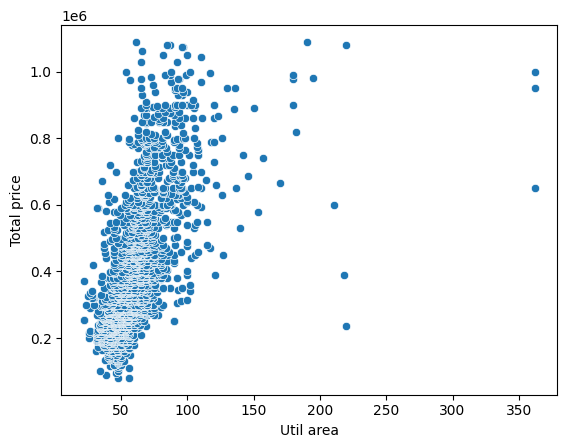

In [20]:
# Plotting the price over the util area
sns.scatterplot(data, x="area_util", y="valor_total")
plt.xlabel("Util area")
plt.ylabel("Total price")

We can see that the price slightly increases when the util area increases

In [21]:
grouped_by_neighborhood = data.groupby(['bairro'])

In [22]:
# Here, i'm getting the number of properties by neighborhood
properties_by_neighborhood = grouped_by_neighborhood.valor_total.count().sort_values()[-10:].reset_index()

Text(0.5, 0, 'Neighborhood')

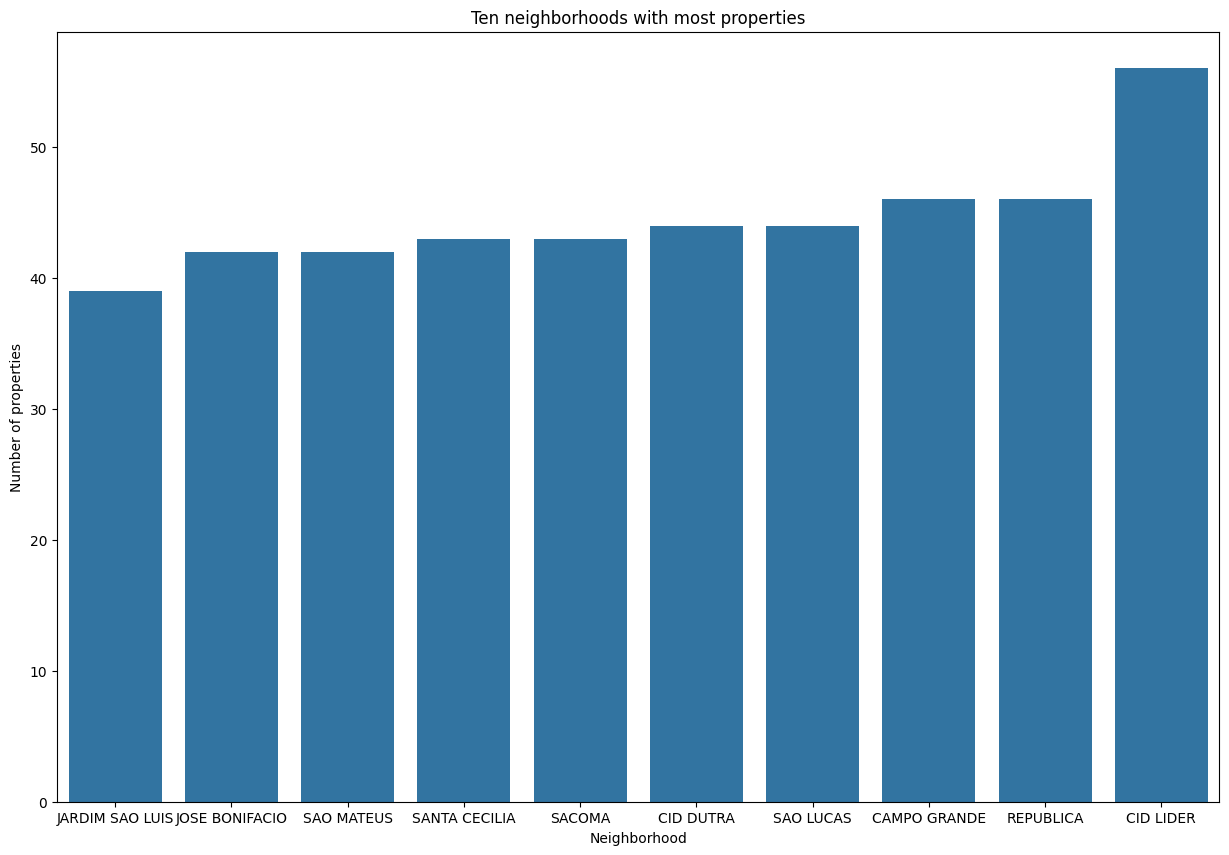

In [23]:
plt.figure(figsize=(15, 10))
sns.barplot(properties_by_neighborhood, x="bairro", y="valor_total")
plt.title("Ten neighborhoods with most properties")
plt.ylabel("Number of properties")
plt.xlabel("Neighborhood")

In [24]:
max_price_by_neighborhood = grouped_by_neighborhood.valor_total.max().sort_values()[-10:].reset_index()

<Axes: xlabel='bairro', ylabel='valor_total'>

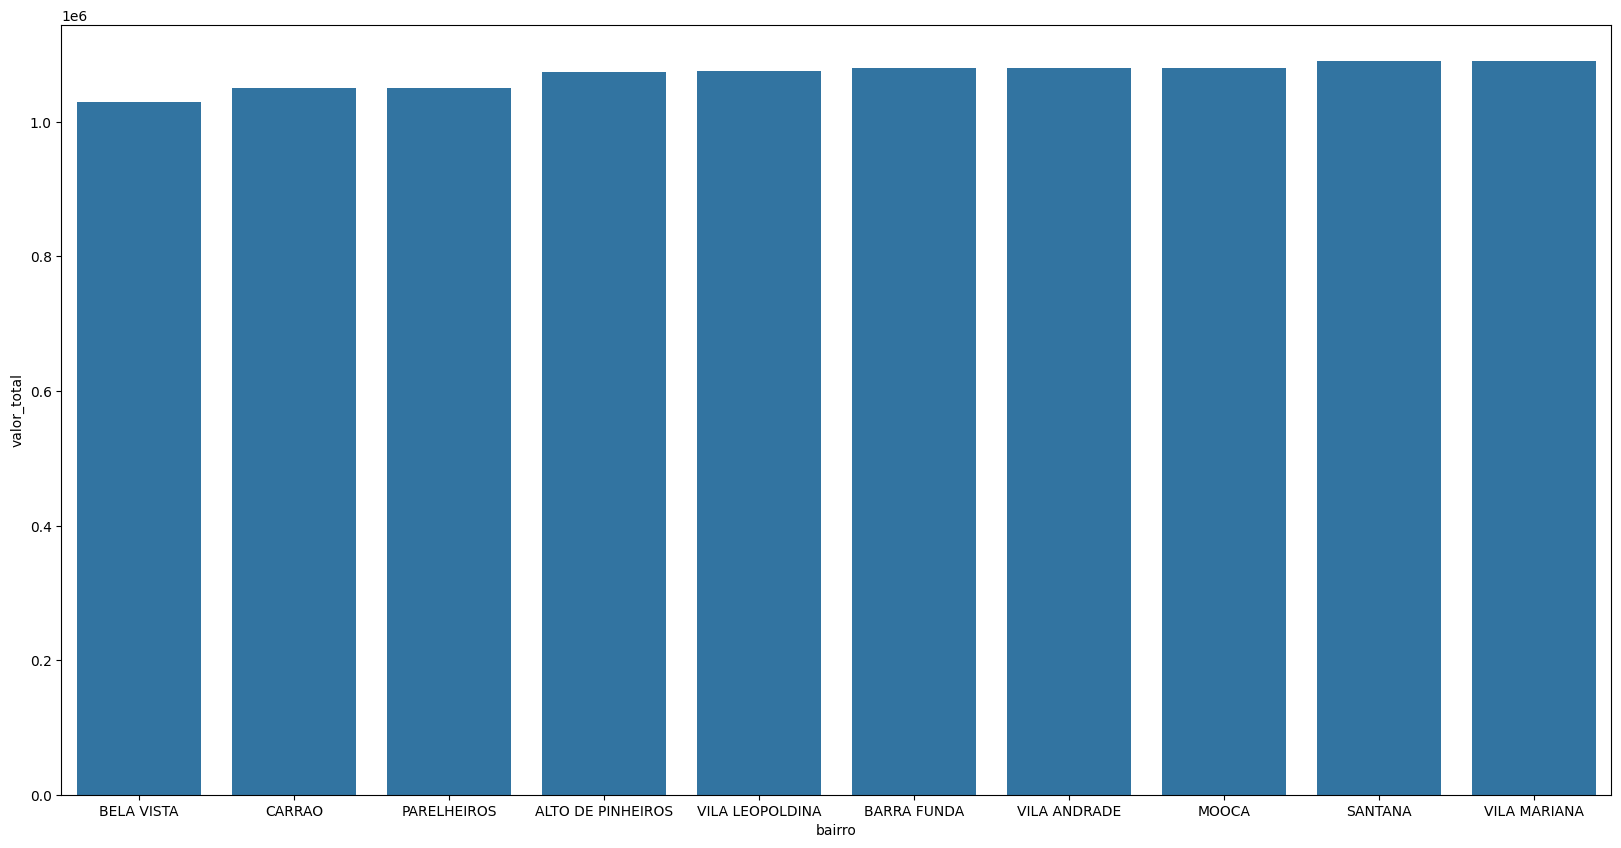

In [25]:
plt.figure(figsize=(20, 10))
sns.barplot(max_price_by_neighborhood, x="bairro", y="valor_total")

**Vila Mariana** and **Santana** has the most expensive property compared to other neighborhoods

Text(0.5, 0, 'Distance to nearest bus stop')

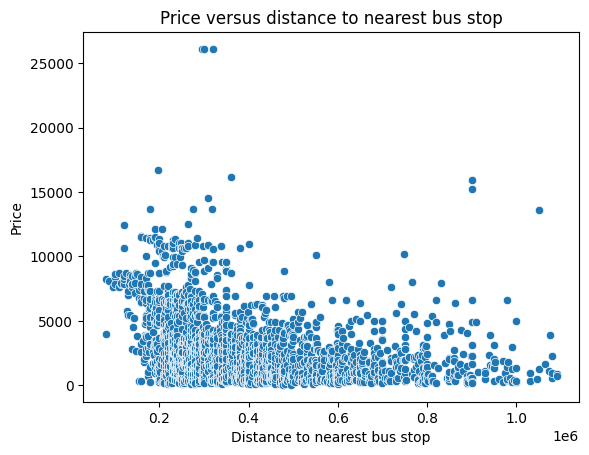

In [26]:
sns.scatterplot(data, x="valor_total", y="dist")
plt.title("Price versus distance to nearest bus stop")
plt.ylabel("Price")
plt.xlabel("Distance to nearest bus stop")

There is a light relation between the price and the distance to the nearest bus stop.

In [27]:
columns = [
    'banheiros', 'quartos', 'suites'
]

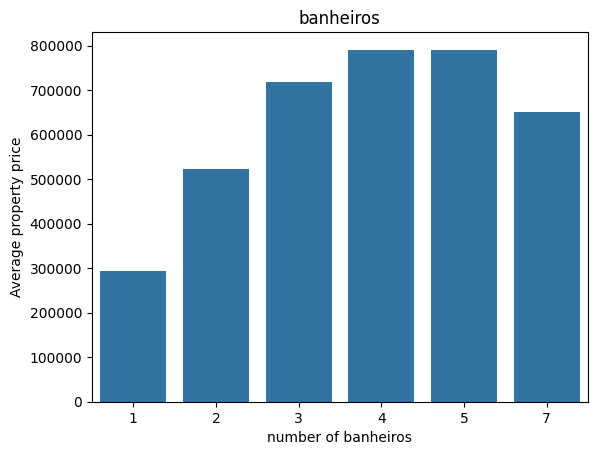

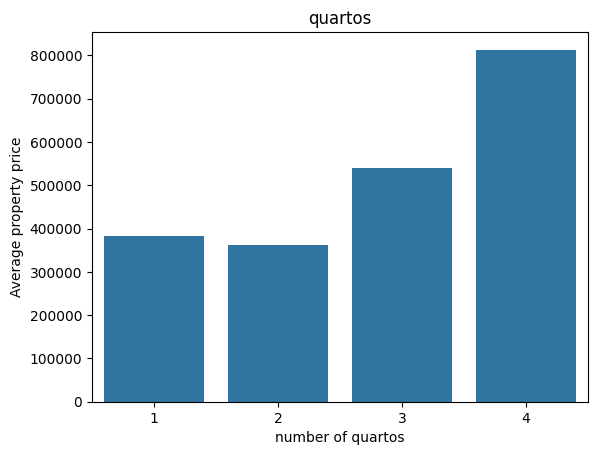

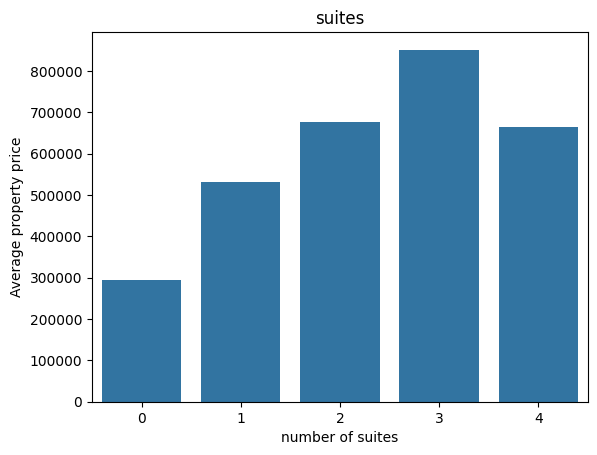

In [28]:
for idx, col in enumerate(columns):
    d = data.groupby(col).valor_total.mean().reset_index()
    plt.figure()
    sns.barplot(d, x=col, y="valor_total")
    plt.title(col)
    plt.ylabel("Average property price")
    plt.xlabel("number of " + col)

The average price of one property increases when the amount of suites, bathrooms or rooms also increases.
The interesting about the price in relation to the number of bathrooms is that for 7 bathrooms there is a hugh decrease in average price

In [29]:
bool_columns = ['piscina', 'academia', 'quadra']

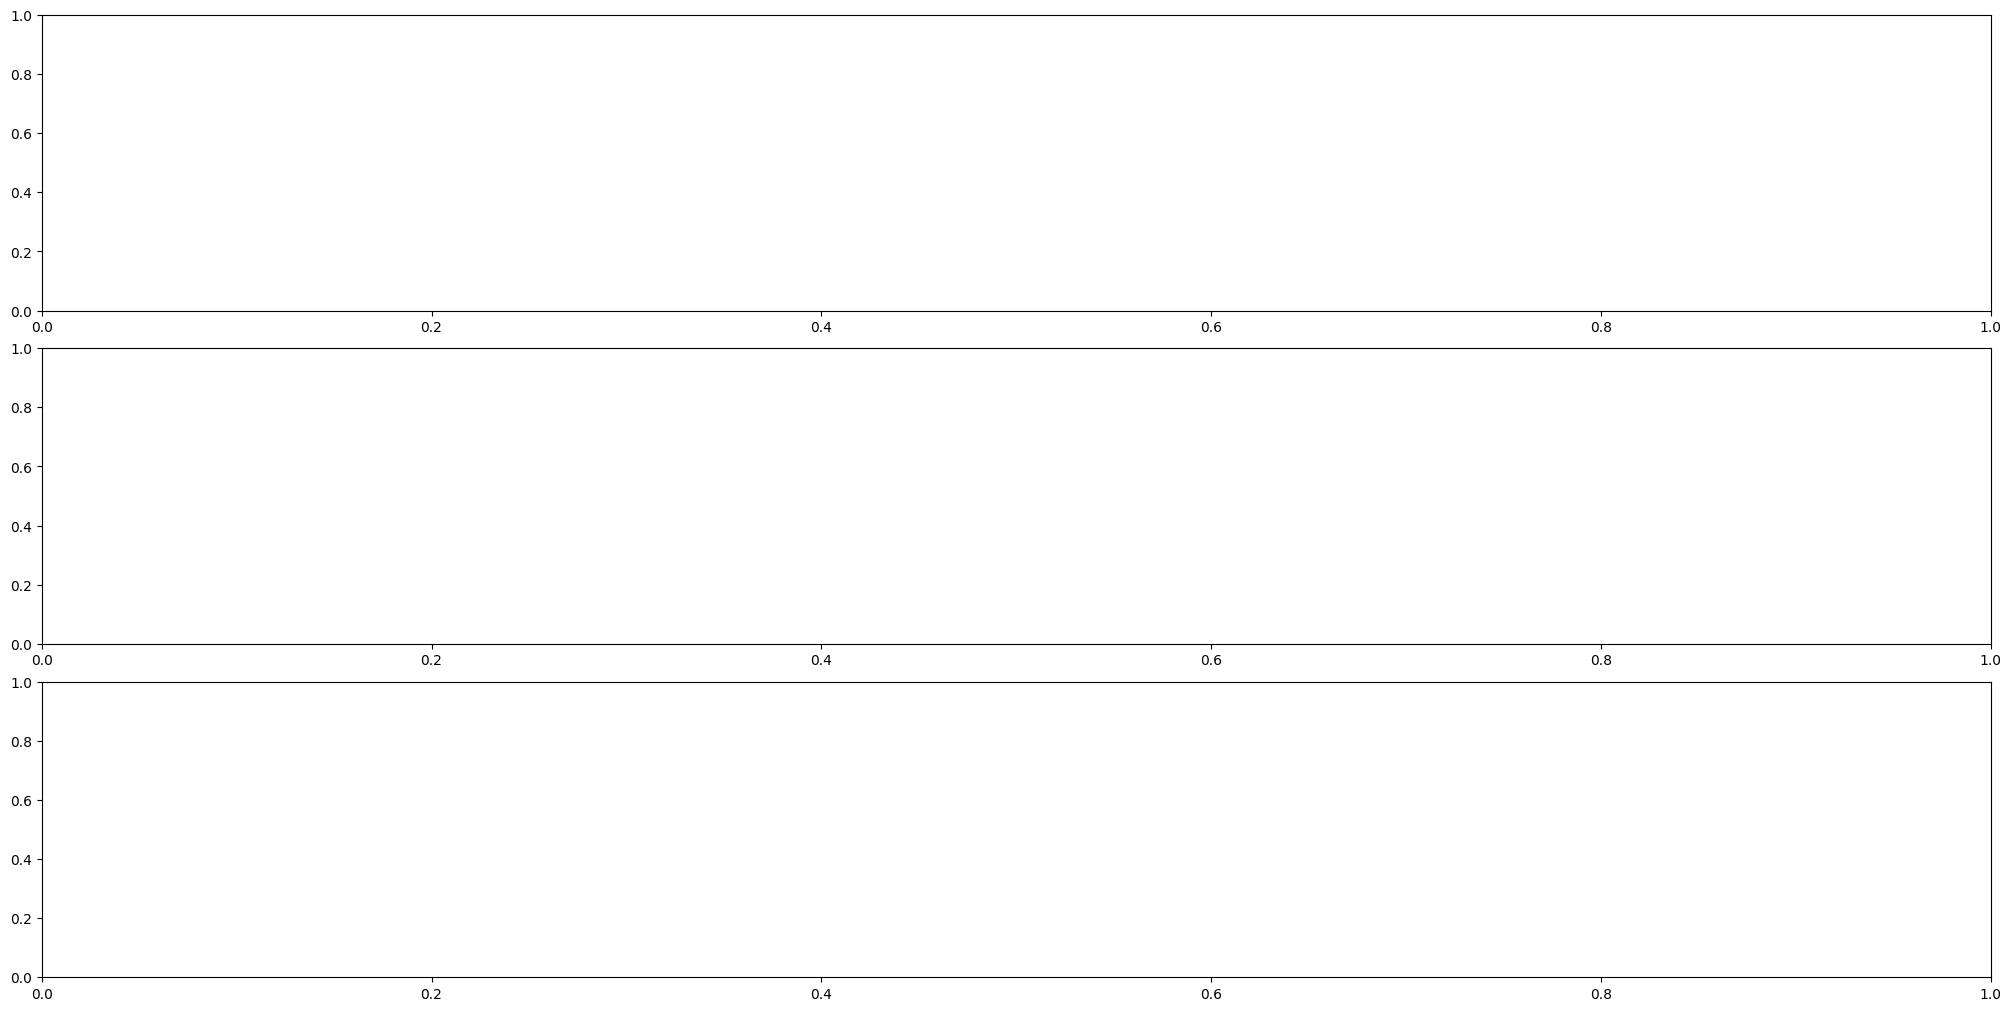

In [30]:
fig, axes = plt.subplots(len(bool_columns), figsize=(20,10), layout='constrained')

In [31]:
for idx,col in enumerate(bool_columns):
    d = data.groupby(col).valor_total.min()
    axes[idx].bar(list(map(str,d.index.values)), d)
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Price')
    axes[idx].set_xlabel(f'Has {col}')

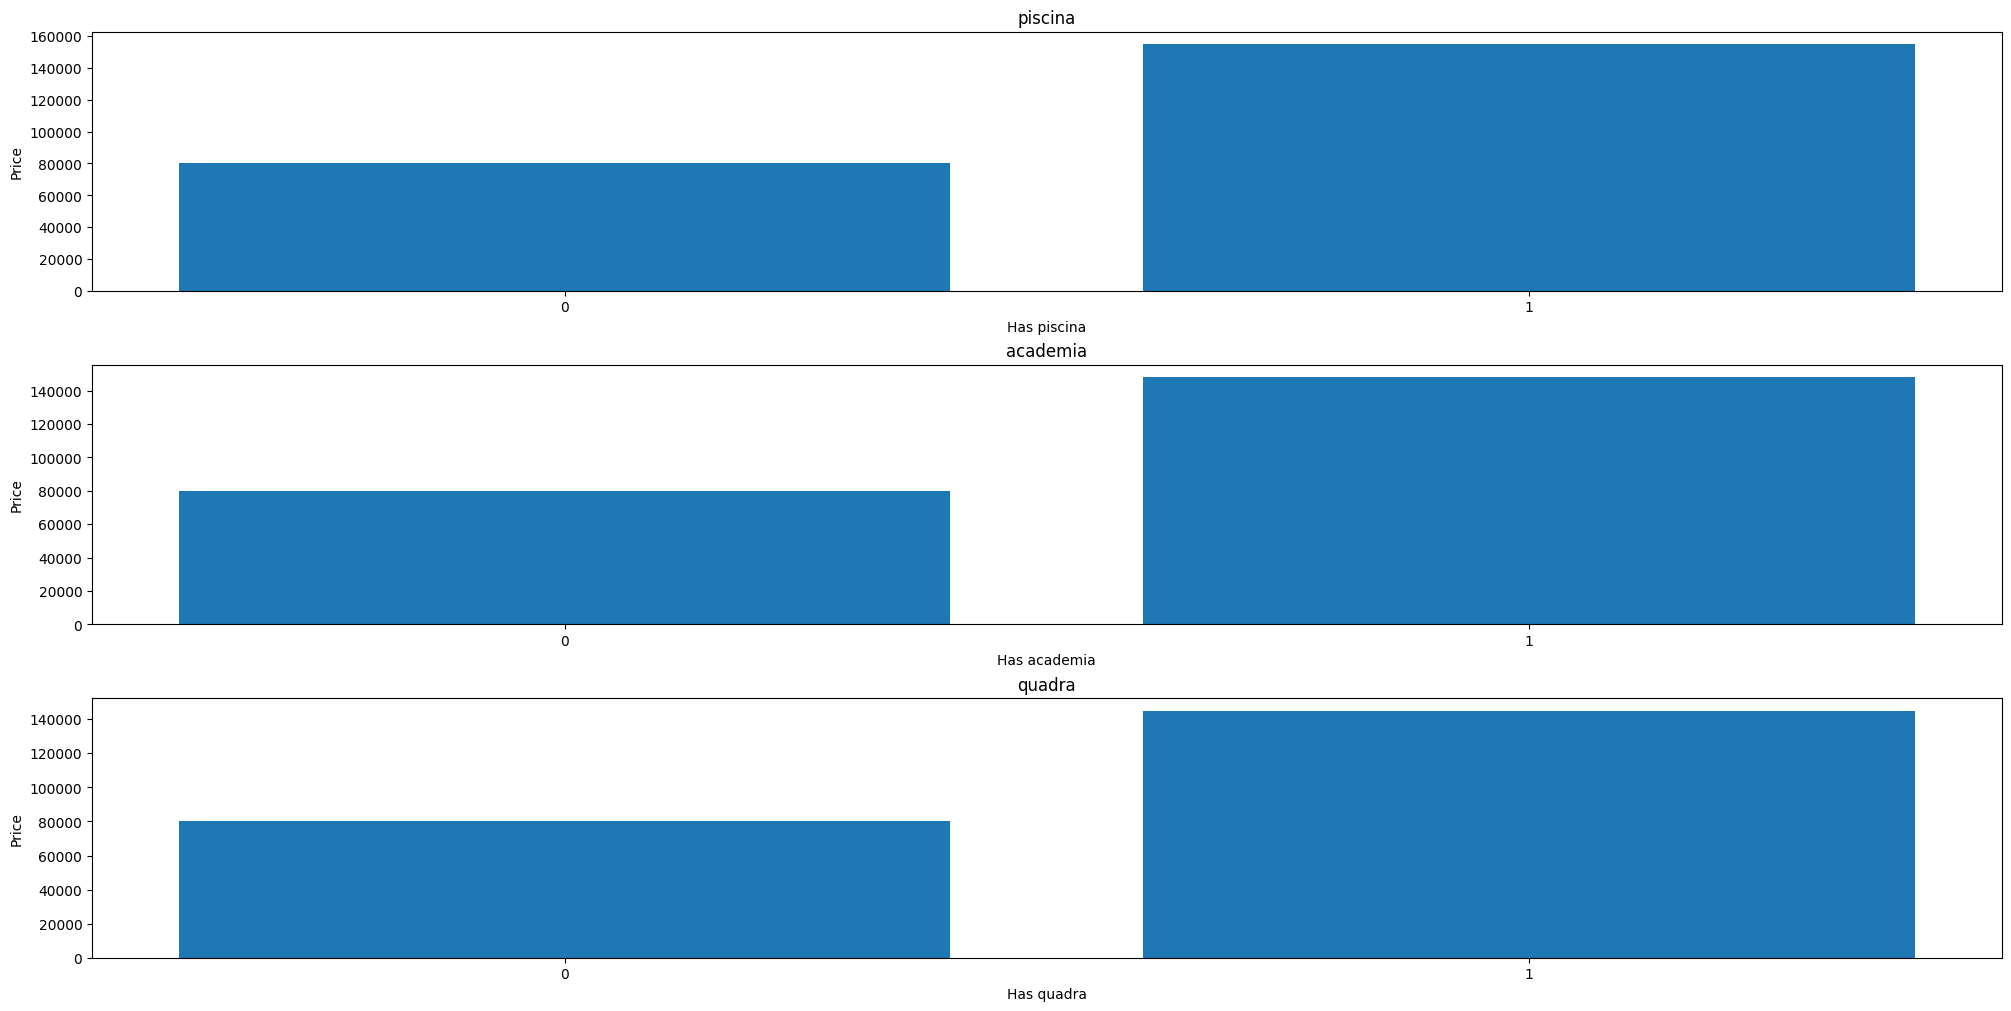

In [32]:
fig

From the chart above, we can see that the minimum money you must have before selecting between pool or gym is twice the value.
Maybe it's a high correlate because all these properties are in a condominium

In [33]:
maxidh_by_neighborhood = grouped_by_neighborhood['media_idh'].max()
life_expectance_by_neighborhood = grouped_by_neighborhood['expectativa_vida'].max()
renda_by_neighborhood = grouped_by_neighborhood['renda_percapita'].max()
avg_price_by_neighborhood = grouped_by_neighborhood.valor_total.mean()

In [34]:
columns = ['media_idh', 'expectativa_vida', 'renda_percapita']

In [35]:
grouped_data = pd.concat([avg_price_by_neighborhood, maxidh_by_neighborhood, renda_by_neighborhood, life_expectance_by_neighborhood], axis=1)

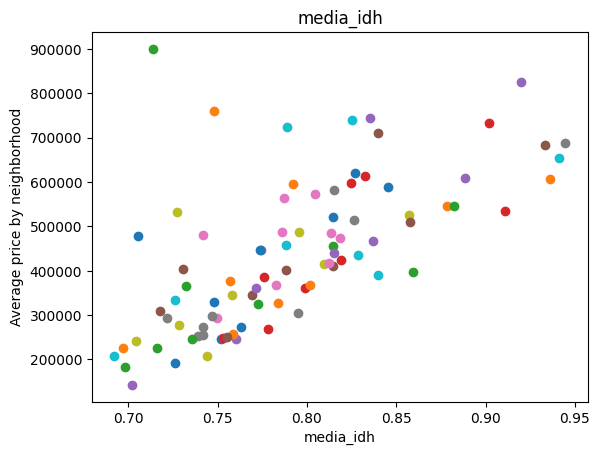

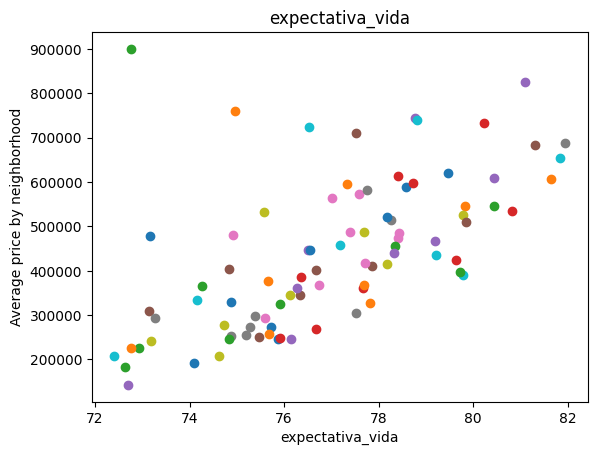

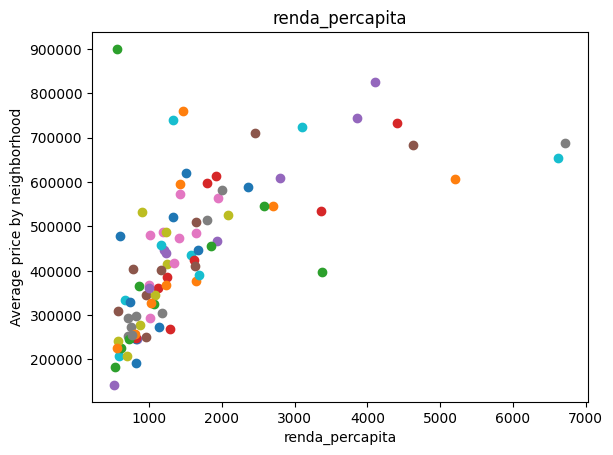

In [36]:
for col in columns:
    plt.figure()
    for idx, row in grouped_data.iterrows():
        plt.scatter(row[col], row["valor_total"], label=idx)
        plt.title(col)
        plt.ylabel("Average price by neighborhood")
        plt.xlabel(col)

We can from the charts above that there is a little relation between the average property price and some social-economic data.

# Results

- **Vila Mariana** and **Santana** have the most expensive properties.
- Property prices tend to increase slightly with larger usable areas
- **Cid Lider** have more properties for sell
- Properties near bus stops are slightly more expensive
- Properties with 4 or 5 bathrooms are more expensive than properties with 7 bathrooms
- Properties with 3 suites are more expensive than properties with 4
- The minimum price for a property is twice its value if it have a pool or gym or a court
- The average price of properties increase for neghborhoods with higher socioeconomic values such as *per capita income*, *life expectancy* and *hdi*